In [1]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [66]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import svm

from sklearn.ensemble import (

    RandomForestClassifier,

    AdaBoostClassifier,

    GradientBoostingClassifier,

)

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier

from sklearn.metrics import (

    mean_absolute_error,

    mean_squared_error,

    accuracy_score,

    confusion_matrix,

)

from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import shuffle

from sklearn.preprocessing import LabelEncoder

import pickle


In [3]:
import os

os.getcwd()

'/kaggle/working'

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-data/Crop_recommendation.csv


In [7]:
file_path = "/kaggle/input/crop-data/Crop_recommendation.csv"

data = pd.read_csv(file_path)

In [8]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
data["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [12]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

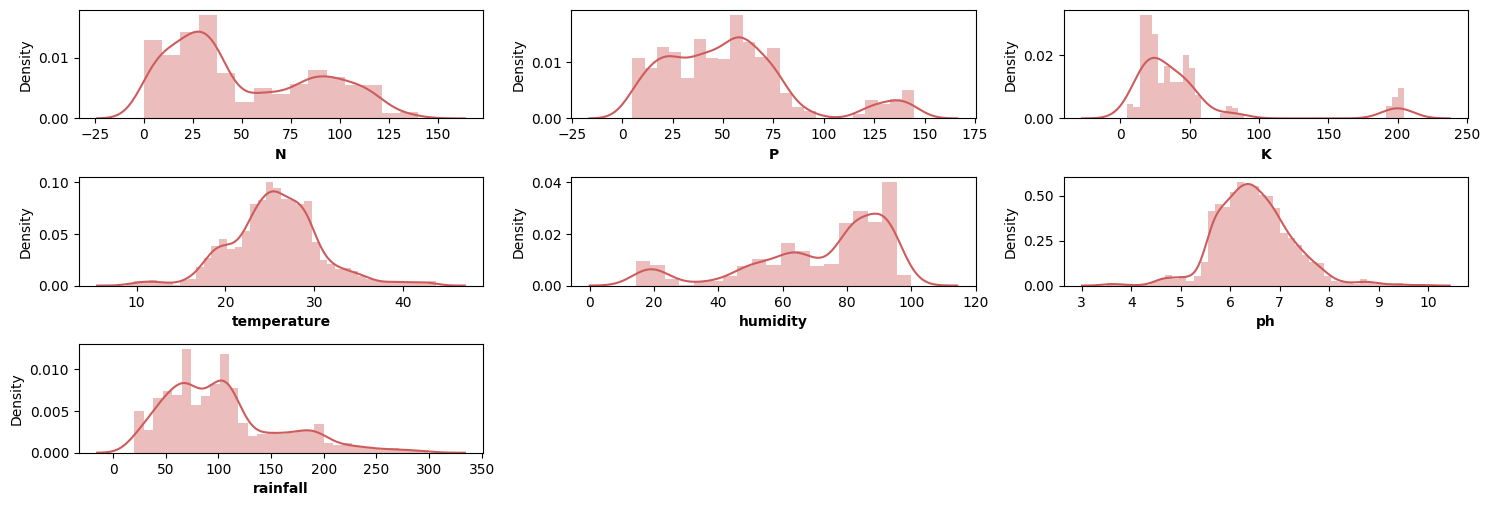

In [13]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']



plt.figure(figsize=(15, 100))

for i, col in enumerate(numeric_features):

    plt.subplot(60, 3, i+1)

    sns.distplot(x=data[col], color='indianred')

    plt.xlabel(col, weight='bold')

    plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

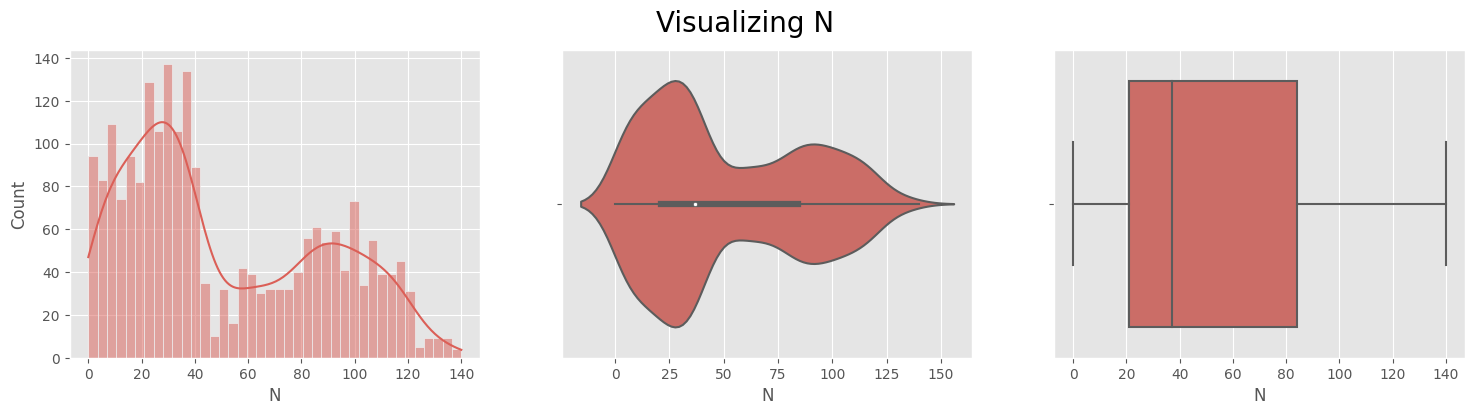

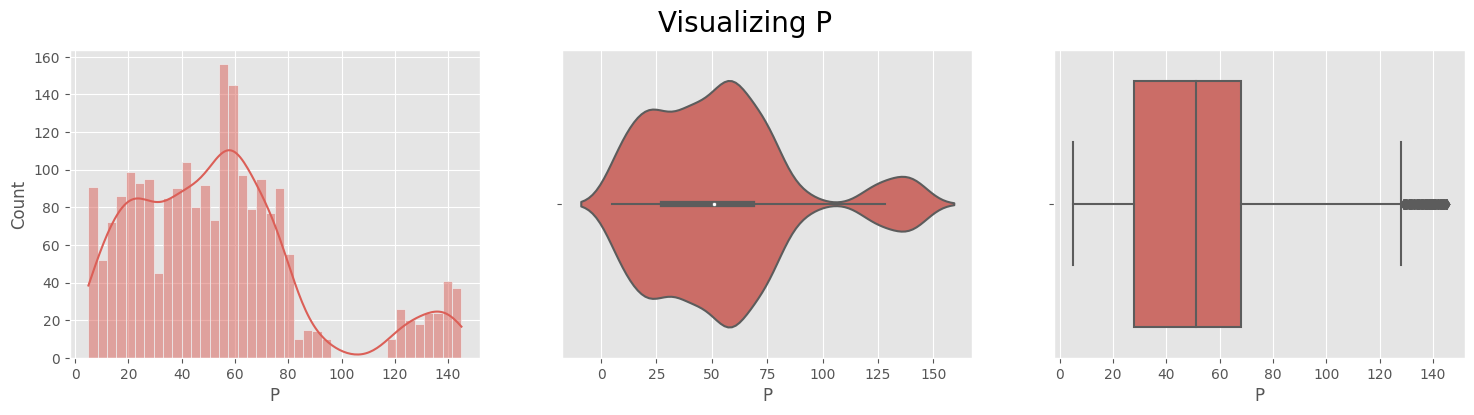

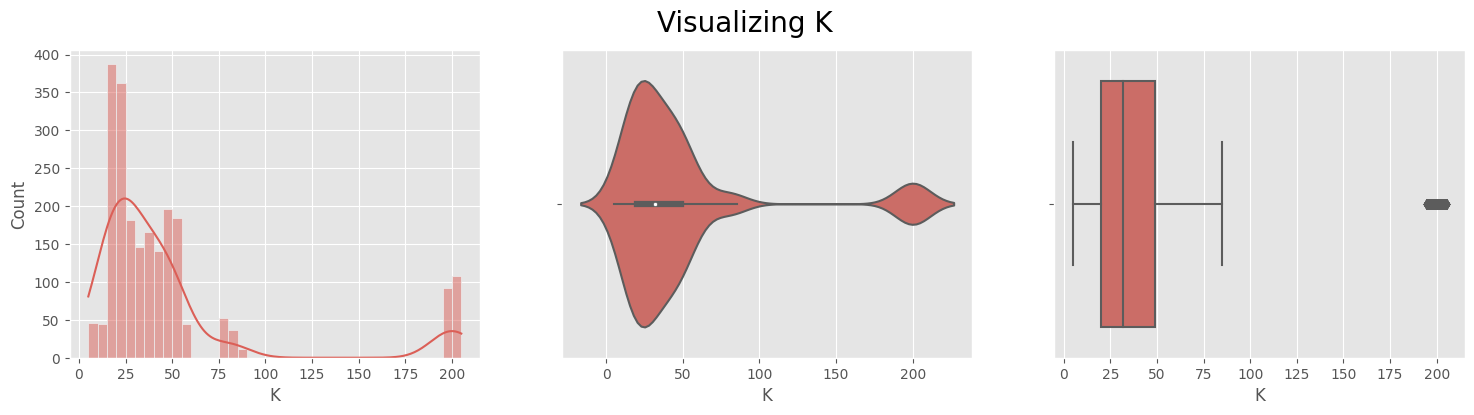

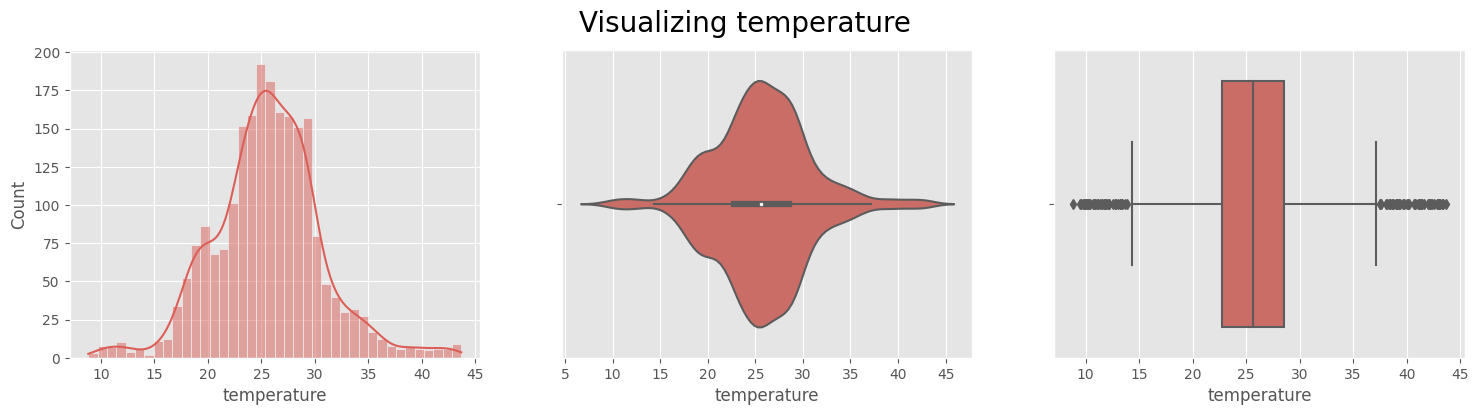

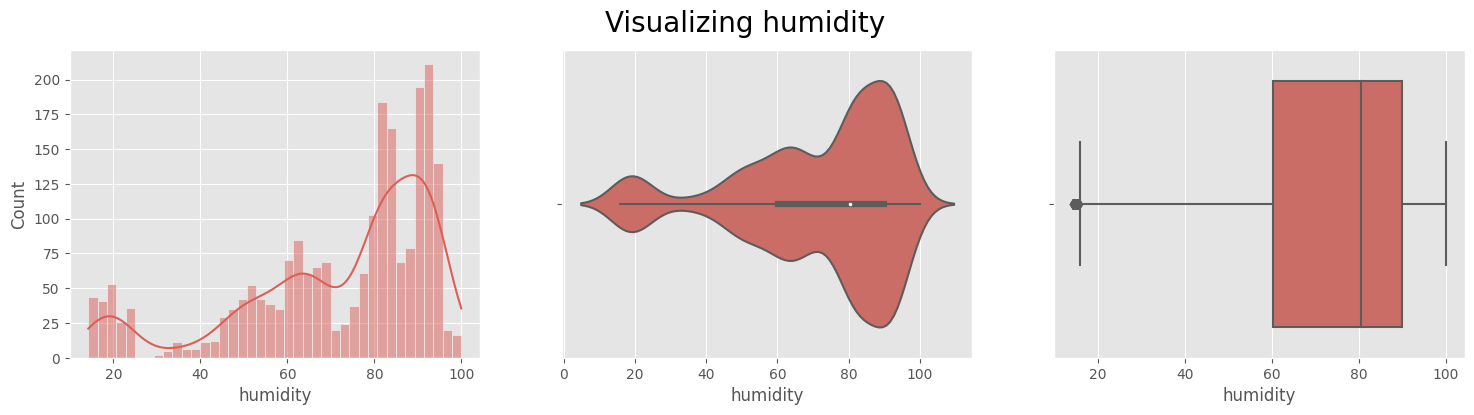

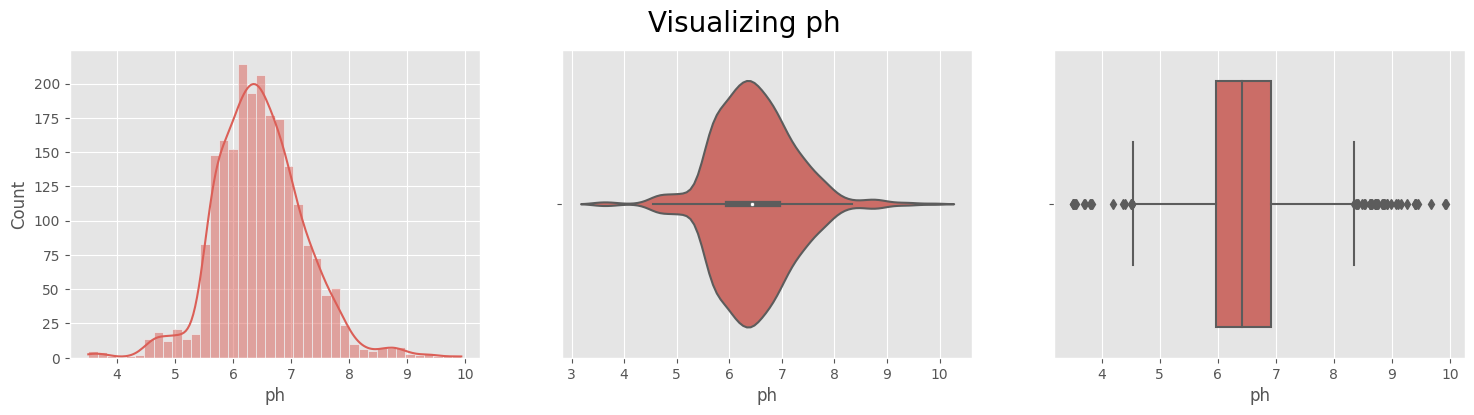

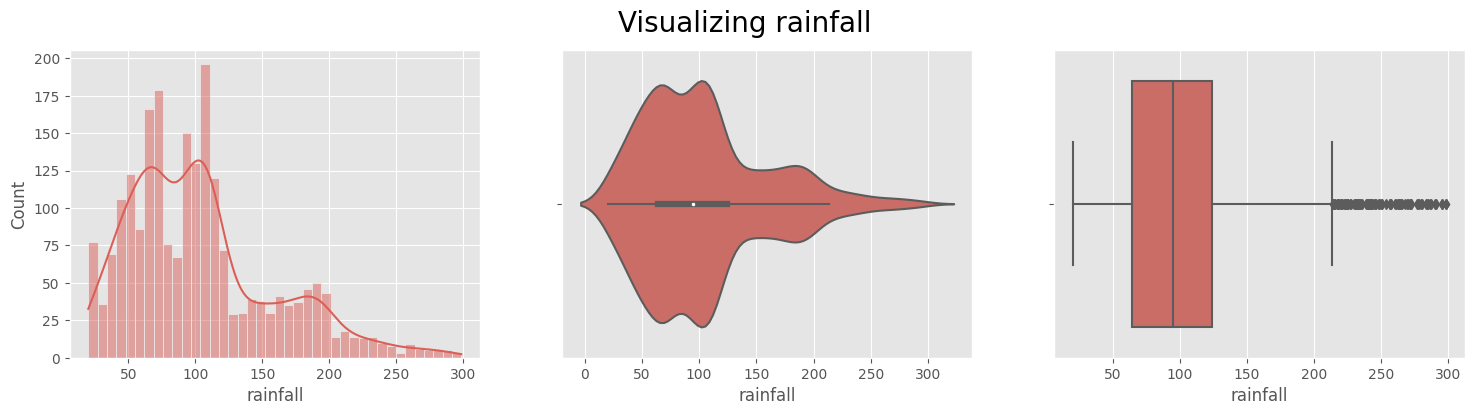

In [14]:
plt.style.use('ggplot')

sns.set_palette("hls", 8)

for i in data.columns[:-1]:

    fig,ax=plt.subplots(1,3,figsize=(18,4))

    sns.histplot(data=data,x=i,kde=True,bins=40,ax=ax[0])

    sns.violinplot(data=data,x=i,ax=ax[1])

    sns.boxplot(data=data,x=i,ax=ax[2])

    plt.suptitle(f'Visualizing {i}',size=20)

In [15]:
data = shuffle(data, random_state=42)

In [16]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,muskmelon
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,watermelon
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,papaya
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,apple
...,...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,orange
1095,108,94,47,27.359116,84.546250,6.387431,90.812505,banana
1130,11,36,31,27.920633,51.779659,6.475449,100.258567,mango
1294,11,124,204,13.429886,80.066340,6.361141,71.400430,grapes


In [17]:
X = data.iloc[:, :-1] 

y = data.iloc[:, -1]   

In [18]:
min_max_scaler = MinMaxScaler()

In [19]:
X_scaled = min_max_scaler.fit_transform(X)

In [20]:
X_scaled

array([[0.72142857, 0.08571429, 0.21      , ..., 0.93873276, 0.41682113,
        0.02190396],
       [0.7       , 0.02142857, 0.23      , ..., 0.84299238, 0.42837304,
        0.10497346],
       [0.42142857, 0.40714286, 0.22      , ..., 0.92265909, 0.5344578 ,
        0.33974203],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43770346, 0.46198144,
        0.28757906],
       [0.07857143, 0.85      , 0.995     , ..., 0.76767796, 0.44420505,
        0.18390291],
       [0.22857143, 0.52142857, 0.085     , ..., 0.5610754 , 0.54465022,
        0.11926686]])

In [21]:
label_encoder = LabelEncoder()

In [22]:
y = label_encoder.fit_transform(y)

In [23]:
label_encoder.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [24]:
y

array([15, 21, 17, ..., 12,  7, 10])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(

    X_scaled, y, test_size=0.2, random_state=42, stratify=y

)

In [26]:
model_params = {

    "decision_tree": {

        "model": DecisionTreeClassifier(),

        "params": {

            "max_depth": [3, 5, 10],

            "min_samples_split": [2, 5],

            "criterion": ["gini", "entropy"],

        },

    },

    "random_forest": {

        "model": RandomForestClassifier(),

        "params": {

            "n_estimators": [10, 50, 100],

            "max_depth": [5, 10, 20],

            "min_samples_split": [2, 5],

            "criterion": ["gini", "entropy"],

        },

    },

    "bagging": {

        "model": BaggingClassifier(),

        "params": {

            "n_estimators": [10, 50, 100],

            "max_samples": [0.5, 1.0],

            "max_features": [0.5, 1.0],

        },

    },

    "adaboost": {

        "model": AdaBoostClassifier(),

        "params": {

            "n_estimators": [50, 100, 200],

            "learning_rate": [0.01, 0.1, 1],

        },

    },

    "gradient_boosting": {

        "model": GradientBoostingClassifier(),

        "params": {

            "n_estimators": [50, 100, 200],

            "learning_rate": [0.01, 0.1, 0.5],

            "max_depth": [3, 5, 7],

        },

    },

}

In [27]:
scores = []

model_results = {}

In [28]:
for model_name, mp in model_params.items():

    clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=True)

    clf.fit(X_train, y_train)



    y_pred = clf.predict(X_test)



    accuracy = accuracy_score(y_test, y_pred)

    mae = mean_absolute_error(y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred)



    model_results[model_name] = {

        "accuracy": clf.cv_results_["mean_test_score"],

        "loss": clf.cv_results_["mean_test_score"]

        - clf.cv_results_["mean_train_score"],

        "conf_matrix": conf_matrix,

        "y_pred": y_pred,

    }



    scores.append(

        {

            "model": model_name,

            "best_score": clf.best_score_,

            "best_params": clf.best_params_,

            "accuracy": accuracy,

            "mae": mae,

            "mse": mse,

        }

    )

In [29]:
df = pd.DataFrame(
    scores, columns=["model", "best_score", "best_params", "accuracy", "mae", "mse"]
)

In [37]:
df

,model,best_score,best_params,accuracy,mae,mse
0,decision_tree,0.988636,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.979545,0.240909,2.840909
1,random_forest,0.997159,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.995455,0.054545,0.654545
2,bagging,0.994886,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e...",0.993182,0.054545,0.531818
3,adaboost,0.893182,"{'learning_rate': 0.1, 'n_estimators': 50}",0.806818,1.690909,19.627273
4,gradient_boosting,0.989205,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.995455,0.040909,0.409091


## from the observations, we see rnadom forest is giving the maximum accuracy

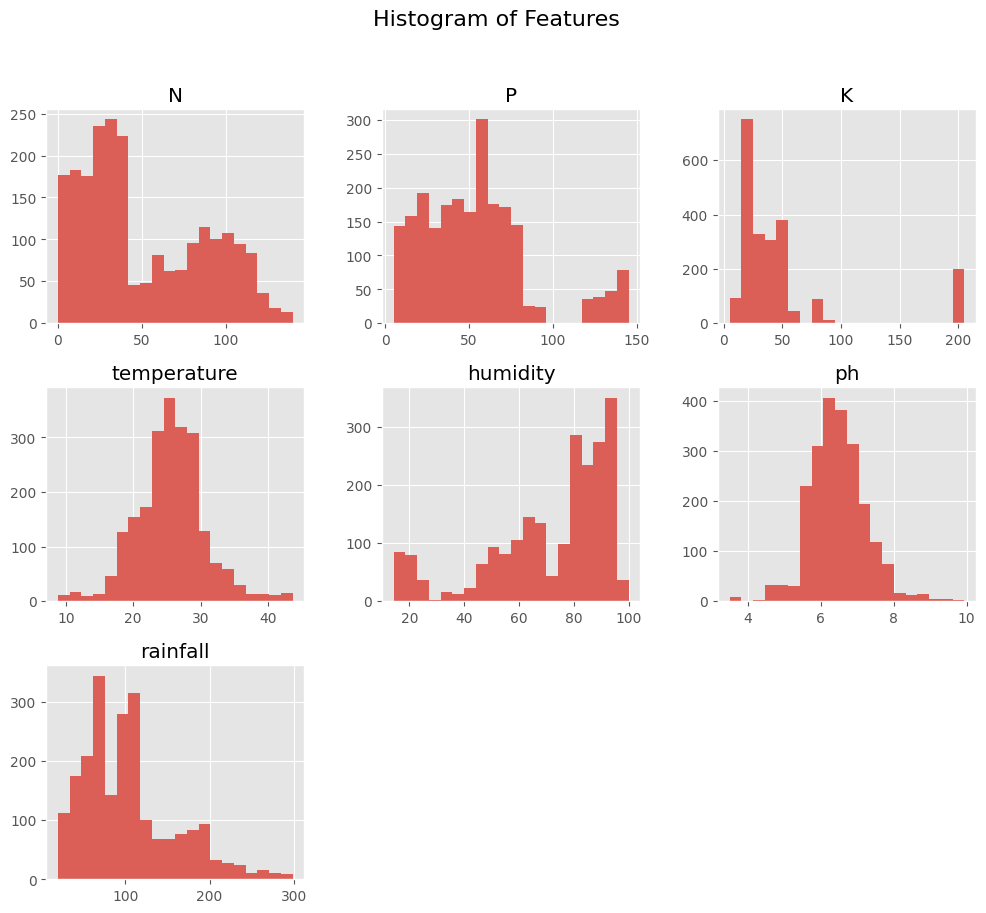

In [30]:
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogram of Features", fontsize=16)
plt.show()

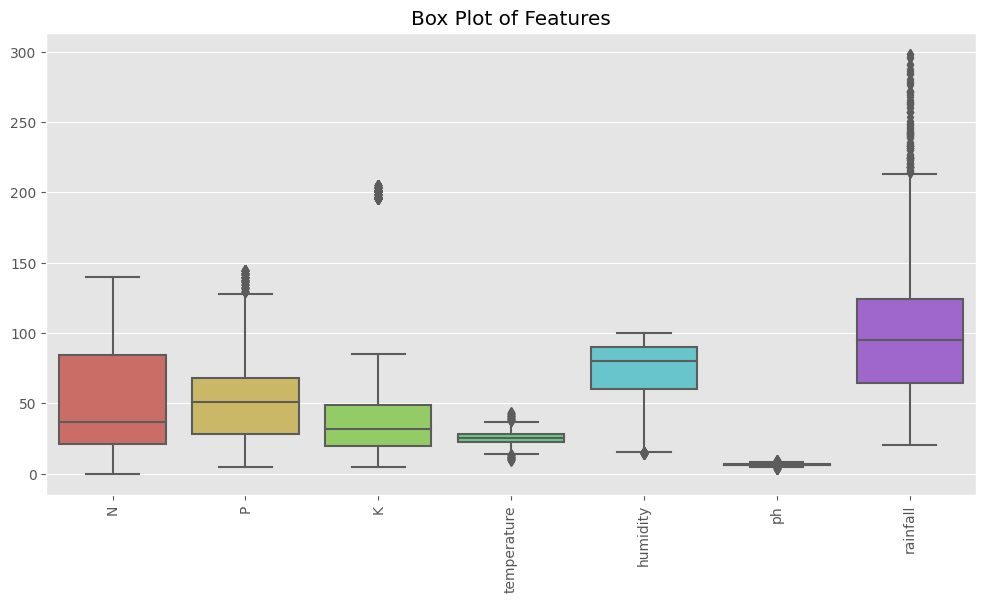

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.iloc[:, :-1])
plt.title("Box Plot of Features")
plt.xticks(rotation=90)
plt.show()

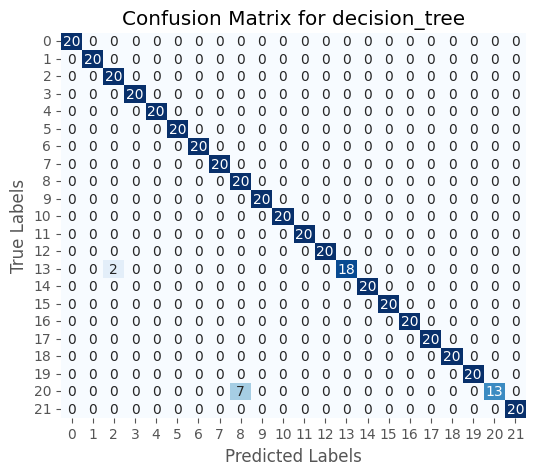

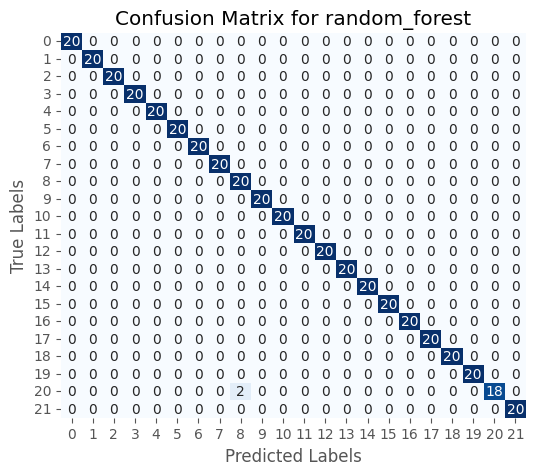

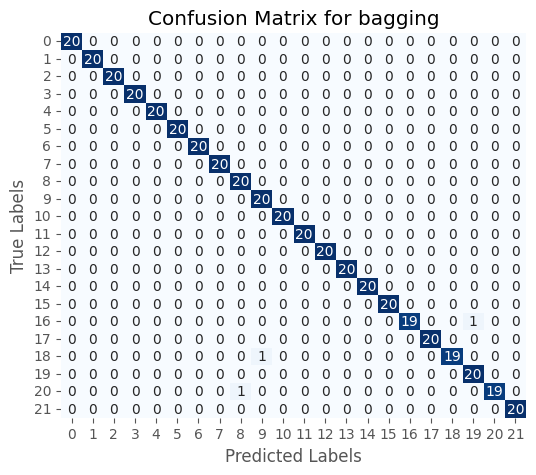

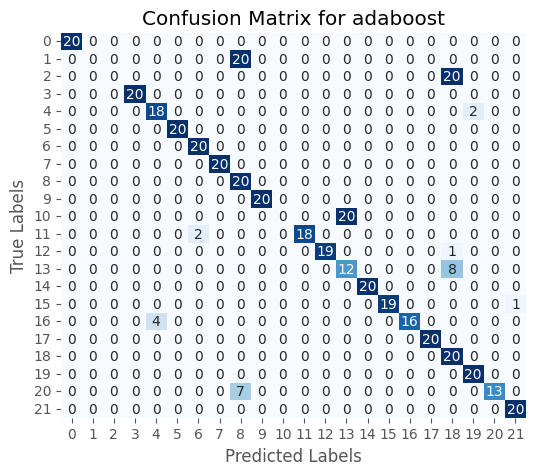

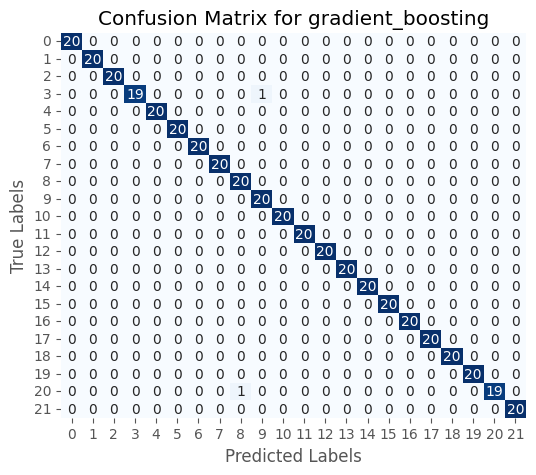

In [33]:
for model_name, results in model_results.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(results["conf_matrix"], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [44]:
best_model = model_params['random_forest']['model']
best_model

RandomForestClassifier()

In [45]:
best_params = df[df['model'] == 'random_forest']['best_params'].values[0]
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 50}

In [59]:
rf_model = RandomForestClassifier(
     criterion ='entropy',
     max_depth = 10,
     min_samples_split = 5,
     n_estimators = 50,
)

In [60]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=50)

In [61]:
y_pred = rf_model.predict(X_test)

In [64]:
y_pred[38]

2

In [65]:
y_test[38]

2

In [67]:
with open('crop_prediction_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [68]:
with open('crop_prediction_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [77]:
model.predict(X_test[10].reshape(1,-1))[0]

21

In [80]:
y_test[10]

21

In [81]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(min_max_scaler, scaler_file)

In [83]:
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

In [ ]:
with open('label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoder, encoder_file)

In [91]:
with open('label_encoder.pkl', 'rb') as encoder_file:
    loaded_label_encoder = pickle.load(encoder_file)

In [106]:
X_testing =[90,42,43,20.879744,82.002744,6.502985,202.935536]

In [110]:
X_testing=np.array([90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]).reshape(1, -1)
X_testing=loaded_scaler.transform(X_testing)
X_testing

array([[0.64285714, 0.26428571, 0.19      , 0.34588614, 0.79026683,
        0.46626359, 0.65645778]])

In [112]:
y_pred=model.predict(X_testing.reshape(1,-1))[0]

In [114]:
labell = loaded_label_encoder.inverse_transform([y_pred])[0]

In [115]:
labell

'rice'